<a href="https://colab.research.google.com/github/Snomo1/Predicting-the-selling-price-of-Used-Cars/blob/main/Car_price1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
!pip install kaggle


In [139]:
import shutil

source_file = 'kaggle2.json'
destination_dir = '/root/.kaggle/'

try:
    shutil.move(source_file, destination_dir)
    print(f"File '{source_file}' moved successfully to '{destination_dir}'.")
except FileNotFoundError:
    print(f"Error: '{source_file}' not found in the current directory.")
except PermissionError:
    print("Error: Permission denied. You might need administrative privileges.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Error: 'kaggle2.json' not found in the current directory.


In [140]:
import os
current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: /content/drive/MyDrive/car_price1


In [141]:
import os

# List the uploaded files
uploaded_files = os.listdir('/content')
print("Uploaded files:")
print(uploaded_files)


Uploaded files:
['.config', 'drive', 'random_forest_model.pkl', 'Car_price_prediction', 'sample_data']


In [142]:
import os

# Get the current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)

# List the files in the current directory
uploaded_files = os.listdir(current_directory)
print("Uploaded files:")
print(uploaded_files)


Current directory: /content/drive/MyDrive/car_price1
Uploaded files:
['Car price.ipynb', '.git', 'Car_price_prediction', 'random_forest_model.pkl']


In [143]:
!mkdir Car_price_prediction


mkdir: cannot create directory ‘Car_price_prediction’: File exists


In [144]:
import os

# List the files in the 'car_price_prediction' directory
directory_path = '/content/Car_price_prediction/'
print("Files in 'Car_price_prediction' directory:")
print(os.listdir(directory_path))


Files in 'Car_price_prediction' directory:
['car_data.csv', '.ipynb_checkpoints']


In [145]:
import pandas as pd

# Load 'car_data.csv' from the 'car_price_prediction' directory
df = pd.read_csv('/content/Car_price_prediction/car_data.csv')


In [146]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv('/content/Car_price_prediction/car_data.csv')



In [147]:
# Display the first few rows of the DataFrame
print(df.head())

# Check the column names
print(df.columns)


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [148]:
# Display summary statistics for numeric variables
print(df.describe())


              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


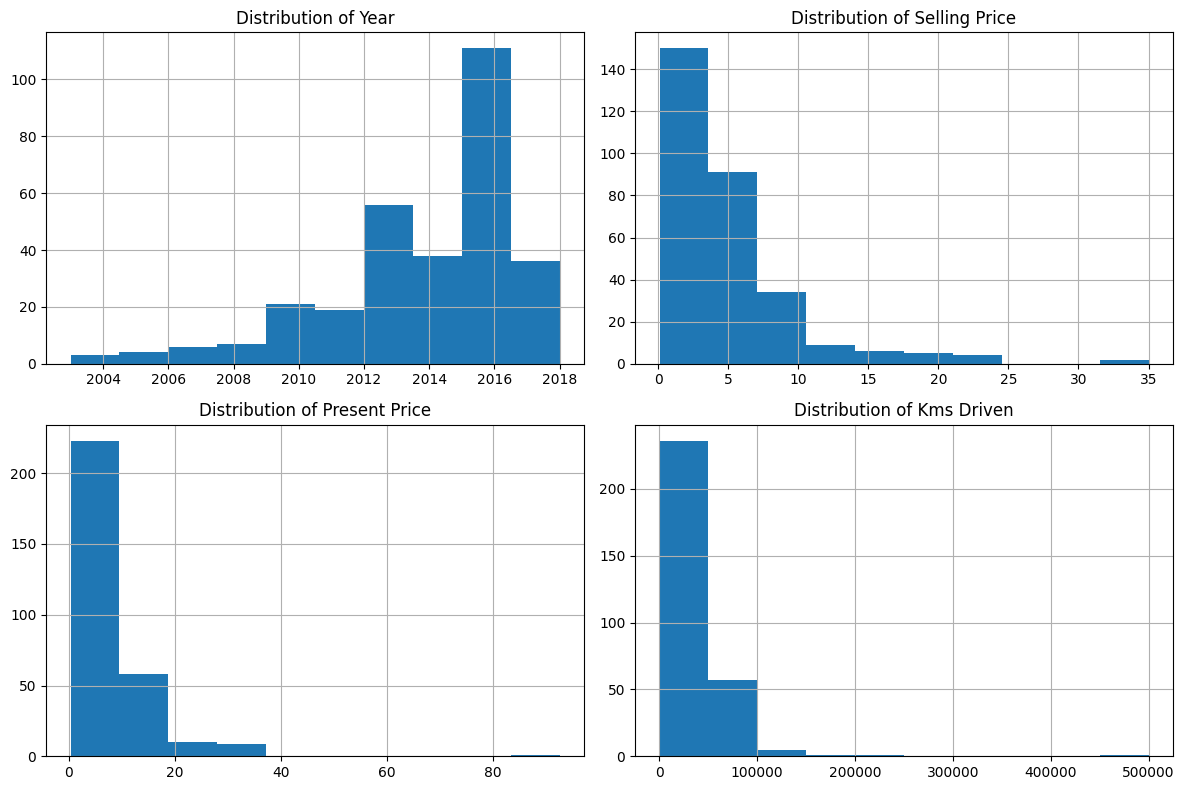

In [149]:
import matplotlib.pyplot as plt

# Plot histograms for numeric variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
df['Year'].hist()
plt.title('Distribution of Year')

plt.subplot(2, 2, 2)
df['Selling_Price'].hist()
plt.title('Distribution of Selling Price')

plt.subplot(2, 2, 3)
df['Present_Price'].hist()
plt.title('Distribution of Present Price')

plt.subplot(2, 2, 4)
df['Kms_Driven'].hist()
plt.title('Distribution of Kms Driven')

plt.tight_layout()
plt.show()


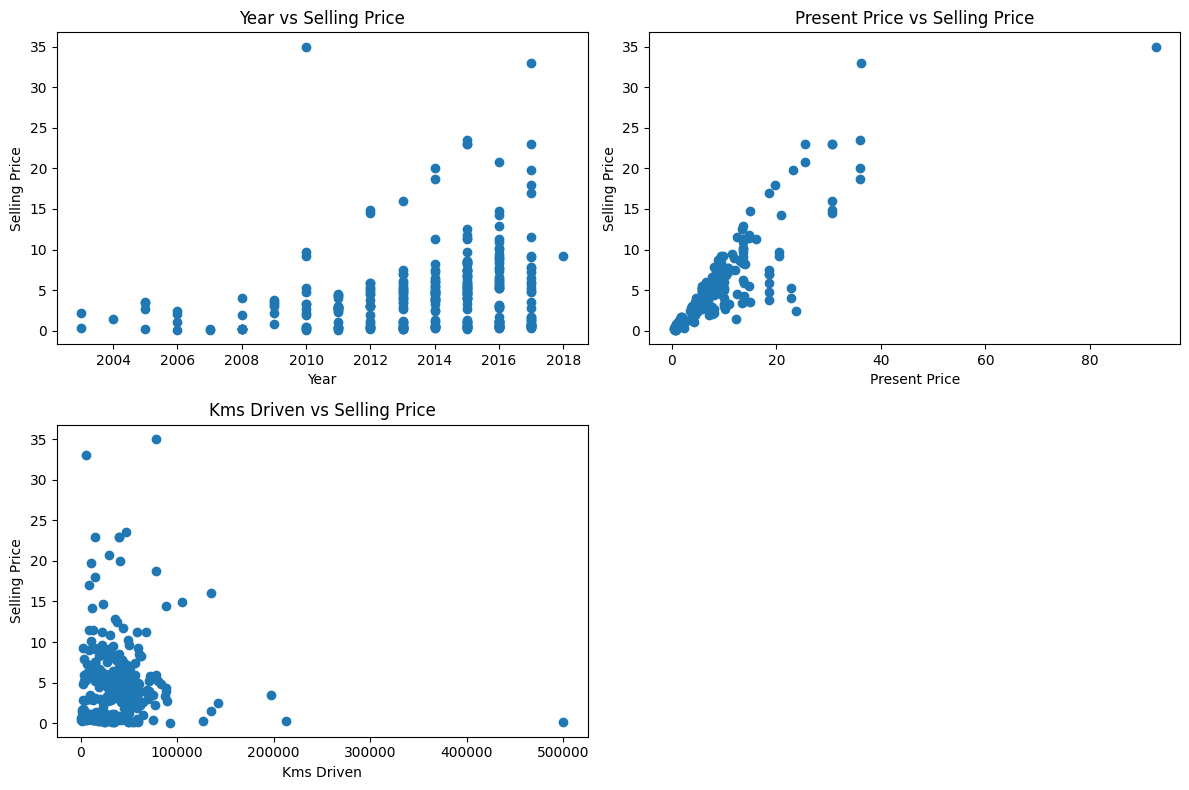

In [150]:
# Plot scatter plots for numeric variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.scatter(df['Year'], df['Selling_Price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Year vs Selling Price')

plt.subplot(2, 2, 2)
plt.scatter(df['Present_Price'], df['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Present Price vs Selling Price')

plt.subplot(2, 2, 3)
plt.scatter(df['Kms_Driven'], df['Selling_Price'])
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.title('Kms Driven vs Selling Price')

plt.tight_layout()
plt.show()


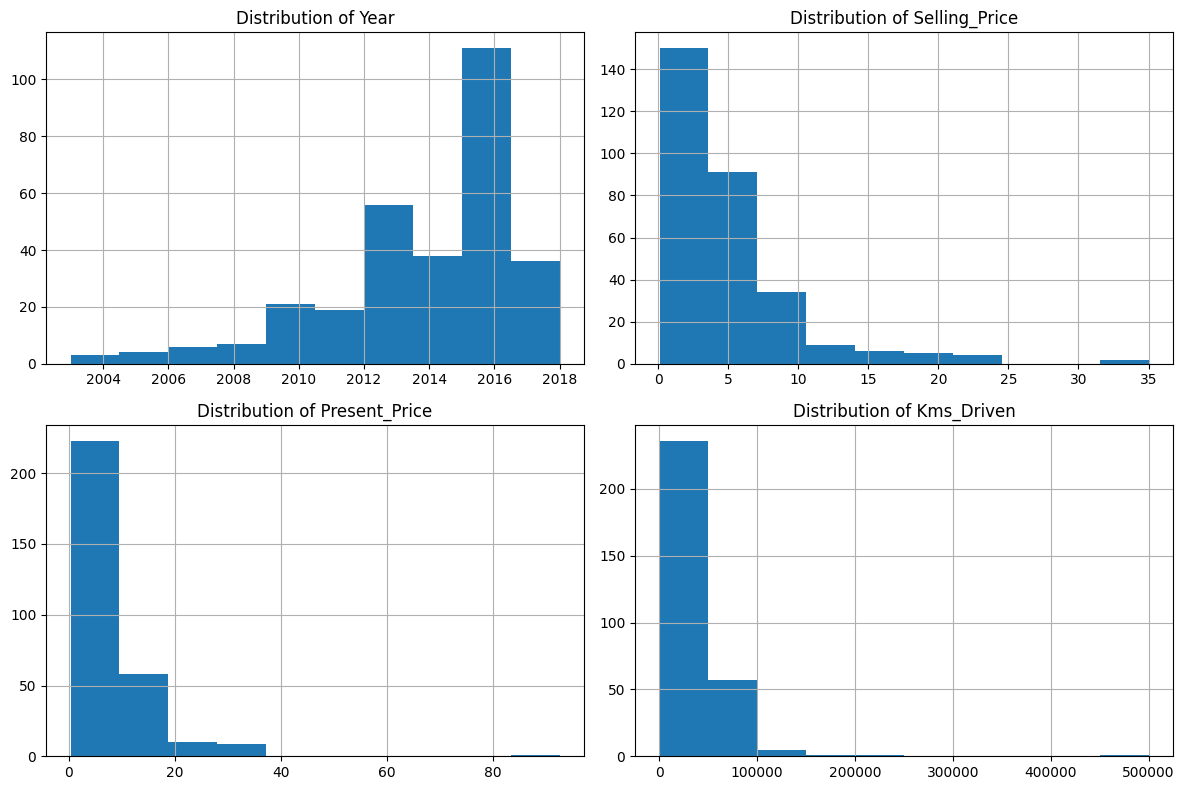

In [151]:
import matplotlib.pyplot as plt

# Select numeric columns for visualization
numeric_columns = ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']

# Plot histograms for numeric variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    df[column].hist()
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [152]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Display the correlation matrix
print(corr_matrix)


                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


In [153]:
missing_values = df.isnull().sum()
print(missing_values)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [154]:
duplicates = df.duplicated().sum()
print(f'Duplicates: {duplicates}')


Duplicates: 2


In [155]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify if duplicates are removed
print(f'Duplicates after removal: {df.duplicated().sum()}')


Duplicates after removal: 0


In [156]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Display the duplicate rows
print(duplicates)


Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]
Index: []


In [157]:
# Save the original DataFrame
original_df = df.copy()



In [158]:
# Check for the column containing the problematic string value
problematic_column = None
for column in df.columns:
    if df[column].dtype == 'object' and df[column].str.contains('Bajaj Pulsar 220 F').any():
        problematic_column = column
        break

# Print the name of the problematic column
if problematic_column:
    print(f"Problematic column found: {problematic_column}")
else:
    print("No problematic column found.")

# If a problematic column is found, filter the DataFrame to show rows where the problematic string value occurs
if problematic_column:
    problematic_rows = df[df[problematic_column] == 'Bajaj Pulsar 220 F']
    print("Rows with problematic string value:")
    print(problematic_rows)


Problematic column found: Car_Name
Rows with problematic string value:
               Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
148  Bajaj Pulsar 220 F  2010           0.52           0.94       45000   
149  Bajaj Pulsar 220 F  2016           0.51           0.94       24000   

    Fuel_Type Seller_Type Transmission  Owner  
148    Petrol  Individual       Manual      0  
149    Petrol  Individual       Manual      0  


In [159]:
# Remove the rows with the problematic string value
df_cleaned = df[df['Car_Name'] != 'Bajaj Pulsar 220 F']

# Verify that the rows are removed
print("Rows with problematic string value removed:")
print(df_cleaned[df_cleaned['Car_Name'] == 'Bajaj Pulsar 220 F'])

Rows with problematic string value removed:
Empty DataFrame
Columns: [Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]
Index: []


In [160]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Fuel_Type', 'Seller_Type', 'Transmission'])

# Verify the encoded DataFrame
print("Encoded DataFrame:")
print(df_encoded.head())

Encoded DataFrame:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Owner  \
0     ritz  2014           3.35           5.59       27000      0   
1      sx4  2013           4.75           9.54       43000      0   
2     ciaz  2017           7.25           9.85        6900      0   
3  wagon r  2011           2.85           4.15        5200      0   
4    swift  2014           4.60           6.87       42450      0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Dealer  \
0          False             False              True                True   
1          False              True             False                True   
2          False             False              True                True   
3          False             False              True                True   
4          False              True             False                True   

   Seller_Type_Individual  Transmission_Automatic  Transmission_Manual  
0                   False           

# **Now** we split it here




In [161]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=False)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   Year  Selling_Price  Present_Price  Kms_Driven  Owner  Car_Name_800  \
0  2014           3.35           5.59       27000      0         False   
1  2013           4.75           9.54       43000      0         False   
2  2017           7.25           9.85        6900      0         False   
3  2011           2.85           4.15        5200      0         False   
4  2014           4.60           6.87       42450      0         False   

   Car_Name_Activa 3g  Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  \
0               False               False                   False   
1               False               False                   False   
2               False               False                   False   
3               False               False                   False   
4               False               False                   False   

   Car_Name_Bajaj Avenger 150  ...  Car_Name_vitara brezza  Car_Name_wagon r  \
0                       False  ...                   False  

In [162]:

from sklearn.model_selection import train_test_split


In [163]:
# Assuming 'Selling_Price' is your target variable
X = df_encoded.drop('Selling_Price', axis=1)  # Features
y = df_encoded['Selling_Price']                # Target variable


In [164]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


#Splitting done. Now we train

In [165]:
from sklearn.linear_model import LinearRegression


In [166]:
# Initialize the Linear Regression model
model = LinearRegression()


In [167]:
# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [168]:
df_encoded

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,True,False,False,False,True,True,False,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
297,2015,4.00,5.90,60000,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
298,2009,3.35,11.00,87934,0,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,True
299,2017,11.50,12.50,9000,0,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [169]:
# Make predictions on the testing data
y_pred = model.predict(X_test)


Linear Regression

In [170]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score: {r2}")


Mean Absolute Error (MAE): 1.5119452560241304
Mean Squared Error (MSE): 10.756582774740274
R-squared Score: 0.36089495517704573


Feature Scaling

In [171]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Random Forest Regressor


In [172]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=2024)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")


Random Forest - Mean Absolute Error (MAE): 0.484398333333333
Random Forest - Mean Squared Error (MSE): 0.6303999004999988
Random Forest - R-squared Score: 0.9625446328910748


Random forest regressor with

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions with reduced ranges
param_dist = {
    'n_estimators': randint(100, 201),  # Reduced range
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],  # Reduced values
    'min_samples_split': randint(2, 6),  # Reduced range
    'min_samples_leaf': randint(1, 3)   # Reduced range
}

# Initialize the model
rf = RandomForestRegressor(random_state=2024)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=2024)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Print the best parameters
print(random_search.best_params_)

# Evaluate the best model
best_rf_model = random_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Random Forest - Mean Absolute Error (MAE): {mae_best_rf}")
print(f"Best Random Forest - Mean Squared Error (MSE): {mse_best_rf}")
print(f"Best Random Forest - R-squared Score: {r2_best_rf}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175}
Best Random Forest - Mean Absolute Error (MAE): 0.6871219047619037
Best Random Forest - Mean Squared Error (MSE): 1.2844287109659858
Best Random Forest - R-squared Score: 0.923685348211005


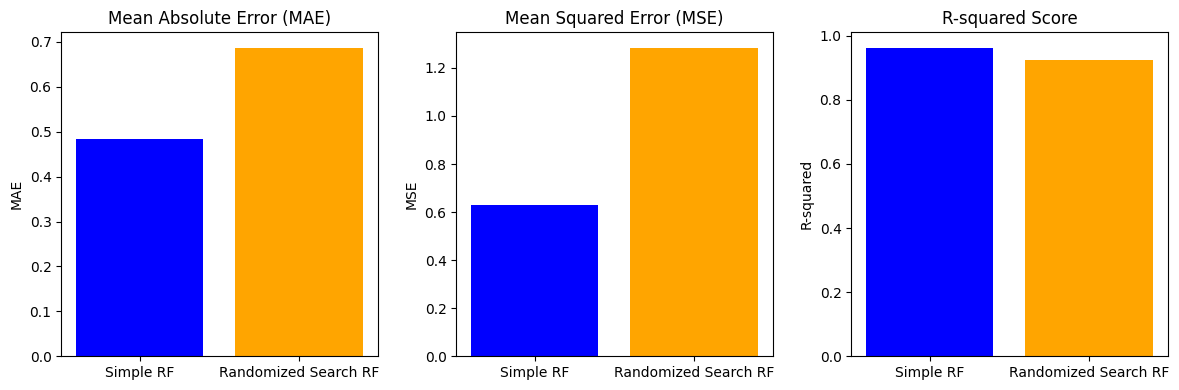

In [174]:
import matplotlib.pyplot as plt

# Values from the results
models = ['Simple RF', 'Randomized Search RF']
mae_values = [0.484, 0.687]
mse_values = [0.630, 1.284]
r2_values = [0.9625, 0.9237]

# Plot MAE
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.bar(models, mae_values, color=['blue', 'orange'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

# Plot MSE
plt.subplot(1, 3, 2)
plt.bar(models, mse_values, color=['blue', 'orange'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# Plot R-squared
plt.subplot(1, 3, 3)
plt.bar(models, r2_values, color=['blue', 'orange'])
plt.title('R-squared Score')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()


#The simple Random Forest model proves more efficient with lower values of MAE and MSE along with R-Squared value closer to 1

Random Forest - Mean Absolute Error (MAE): 0.484398333333333
Random Forest - Mean Squared Error (MSE): 0.6303999004999988
Random Forest - R-squared Score: 0.9625446328910748
Feature Importances:
Present_Price: 0.8650570825683065
Year: 0.08749261631050591
Kms_Driven: 0.019966525881049732
Car_Name_land cruiser: 0.004984426994924938
Car_Name_city: 0.00343409196919489
Seller_Type_Individual: 0.002552617396025169
Transmission_Automatic: 0.0019841627933022766
Owner: 0.0017612035291207024
Car_Name_fortuner: 0.0016615266085445622
Car_Name_innova: 0.0016305290270982283
Car_Name_camry: 0.001553624760427337
Transmission_Manual: 0.001534471115504061
Seller_Type_Dealer: 0.0013629554907655373
Car_Name_corolla altis: 0.0010830407213854975
Fuel_Type_Diesel: 0.0009539704359063124
Fuel_Type_Petrol: 0.0006486228549825189
Car_Name_creta: 0.00040348473858193
Car_Name_elantra: 0.0003151542739492372
Car_Name_verna: 0.00029324817661300826
Car_Name_etios cross: 0.00022168765916693865
Car_Name_amaze: 0.00018357

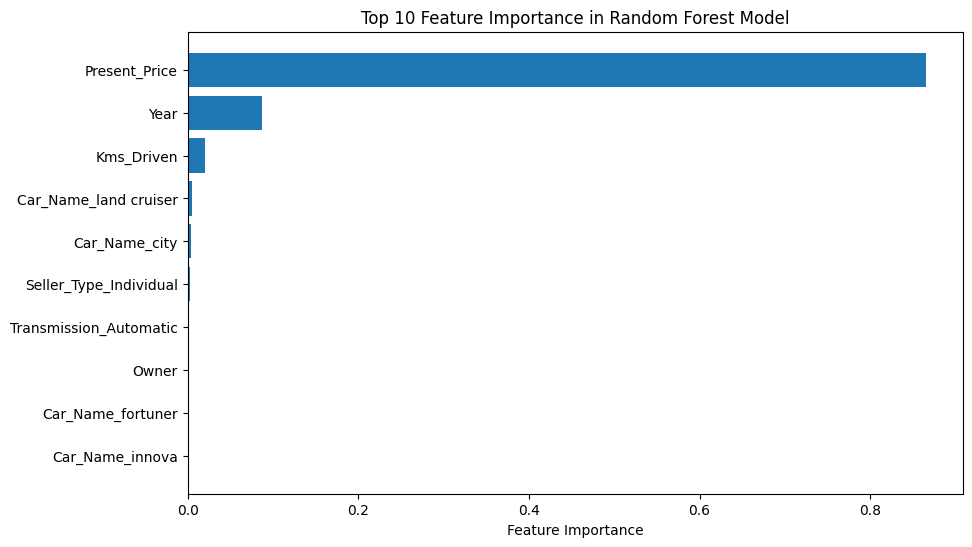

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # For saving the model

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=2024)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics
print(f"Random Forest - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared Score: {r2_rf}")

# Save the model
joblib.dump(rf_model, 'random_forest_model.pkl')

# Feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance = sorted(zip(importances, feature_names), reverse=True)

print("Feature Importances:")
for importance, name in feature_importance:
    print(f"{name}: {importance}")

# Plot feature importance
import matplotlib.pyplot as plt

# Plot for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh([x[1] for x in feature_importance[:10]], [x[0] for x in feature_importance[:10]])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()



The feature importance analysis reveals that Present_Price is the most significant feature, contributing 86.5% to the model's decisions. This suggests that the price of the car at present is the most critical factor in determining its predicted value.
Year is the second most significant feature, contributing 8.7%. This indicates that the age of the car also plays an important role in its valuation.
Kms_Driven is the third significant feature, contributing 2.0%. The number of kilometers driven impacts the car's value but to a lesser extent than Present_Price and Year.
The remaining features have very low importance scores, implying that they contribute minimally to the model's performance.


In [176]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the training data
y_train_pred = rf_model.predict(X_train_scaled)

# Evaluate the model on the training data
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Training Set Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train}")
print(f"Mean Squared Error (MSE): {mse_train}")
print(f"R-squared Score: {r2_train}")
print()

# Evaluate the model on the testing data
mae_test = mean_absolute_error(y_test, y_pred_rf)
mse_test = mean_squared_error(y_test, y_pred_rf)
r2_test = r2_score(y_test, y_pred_rf)

print("Testing Set Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R-squared Score: {r2_test}")


Training Set Evaluation Metrics:
Mean Absolute Error (MAE): 0.2521326359832634
Mean Squared Error (MSE): 0.4027566141841006
R-squared Score: 0.9848848108275324

Testing Set Evaluation Metrics:
Mean Absolute Error (MAE): 0.484398333333333
Mean Squared Error (MSE): 0.6303999004999988
R-squared Score: 0.9625446328910748


In [177]:
'''def predict_selling_price(year, kms_driven):
    # Create input features
    example_features = [[year, kms_driven]]

    # Predict the selling price using the trained model
    predicted_price = rf_model.predict(example_features)

    return predicted_price[0]

# Example usage:
year = 2015  # Example year of manufacture
kms_driven = 50000  # Example mileage in kilometers

# Predict the selling price
predicted_price = predict_selling_price(year, kms_driven)
print("Predicted Selling Price:", predicted_price)'''


'def predict_selling_price(year, kms_driven):\n    # Create input features\n    example_features = [[year, kms_driven]]\n\n    # Predict the selling price using the trained model\n    predicted_price = rf_model.predict(example_features)\n\n    return predicted_price[0]\n\n# Example usage:\nyear = 2015  # Example year of manufacture\nkms_driven = 50000  # Example mileage in kilometers\n\n# Predict the selling price\npredicted_price = predict_selling_price(year, kms_driven)\nprint("Predicted Selling Price:", predicted_price)'

In [178]:
'''# Define a function to predict selling price
def predict_selling_price(features):
    # Preprocess the input features
    scaled_features = preprocess_input(features)

    # Make predictions using the machine learning model
    predicted_price = rf_model.predict(scaled_features)

    return predicted_price

# Example features (replace with your actual input features)
features = {
    'Year': 2018,
    'Kms_Driven': 50000,
    'Fuel_Type': 'Petrol',
    'Seller_Type': 'Dealer',
    'Transmission': 'Manual',
    # Add more features as needed
}


# Predict the selling price
predicted_price = predict_selling_price(example_features)
print("Predicted Selling Price:", predicted_price)'''


'# Define a function to predict selling price\ndef predict_selling_price(features):\n    # Preprocess the input features\n    scaled_features = preprocess_input(features)\n\n    # Make predictions using the machine learning model\n    predicted_price = rf_model.predict(scaled_features)\n\n    return predicted_price\n\n# Example features (replace with your actual input features)\nfeatures = {\n    \'Year\': 2018,\n    \'Kms_Driven\': 50000,\n    \'Fuel_Type\': \'Petrol\',\n    \'Seller_Type\': \'Dealer\',\n    \'Transmission\': \'Manual\',\n    # Add more features as needed\n}\n\n\n# Predict the selling price\npredicted_price = predict_selling_price(example_features)\nprint("Predicted Selling Price:", predicted_price)'